# Machine Learning (CS-433)
## Class Project 1
Simon Canales, Jordan Willemin, Claudio Loureiro

In [1]:
import numpy as np

from proj1_helpers import *
from implementations import *
from utils import *

# Plot libraries
import matplotlib
import matplotlib.pyplot as plt

In [2]:
training_pred, training_data, ids_tr = load_csv_data("../data/train.csv")
testing_pred, testing_data, ids_te = load_csv_data("../data/test.csv")

# Preprocessing

In [3]:
def adjust_wrong_data(traning_data, y_training, wrongValue):
    for i in range(np.shape(training_data)[1]):
        feature = training_data[:,i] 
        feature_class_1 = feature[y_training==-1]
        feature_class_1_clean = feature_class_1[feature_class_1!=wrongValue]
        feature_mean_1 = np.mean(feature_class_1_clean)
        feature_class_2 = feature[y_training==1]
        feature_mean_2 = np.mean(feature_class_2[feature_class_2!=wrongValue])
        for j in range(np.shape(training_data)[0]):
            if y_training[j] == -1 and training_data[j,i] == wrongValue:
                training_data[j,i] = feature_mean_1
            if y_training[j] == 1 and training_data[j,i] == wrongValue:
                training_data[j,i] = feature_mean_2
    return training_data

In [4]:
wrong_value = -999
training_data = adjust_wrong_data(training_data, training_pred, wrong_value)

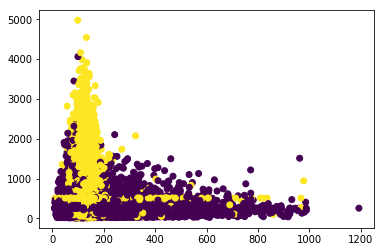

In [18]:
x1 = training_data[:,0]
x2 = training_data[:,5]

plt.scatter(x1,x2, c = training_pred)
plt.show()

# Least Squares Gradient Descent

In [6]:
tx = build_poly(training_data, 2)
initial_w = np.zeros(tx.shape[1])
max_iters = 10
gamma = 0.01

k_fold = 4
indexes_te, indexes_tr = get_split_indexes(training_data, training_pred, k_fold)
mse_tr_mean, mse_te_mean, rmse_tr_mean, rmse_te_mean, accuracy = cross_validation(least_squares_GD, 
                                                                                  compute_mse, tx, training_pred, indexes_te, 
                                                                                  indexes_tr, k_fold, True, 
                                                                                  (initial_w, max_iters, gamma))

print('Mse: ', format(mse_te_mean))
print('Rmse: ', format(rmse_te_mean))
print('Accuracy: ', format(accuracy))

Mse:  0.35480318404888356
Rmse:  0.8423813673733336
Accuracy:  0.8703040000000002
